# Projet Airflow - Pipeline Tourisme : Exploration et Transformation des Données Météo

Ce notebook présente les étapes principales pour explorer, transformer et analyser les données météo utilisées dans le pipeline Airflow du projet Tourisme.


In [ ]:
# Import des librairies nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


## Chargement des jeux de données

Nous allons charger les fichiers CSV produits par le pipeline : archive, forecast et current.


In [ ]:
# Définition des chemins des fichiers
archive_path = (
    "/home/peace/airflow/dags/tourisme/data/processed/archive_meteo_global.csv"
)
forecast_path = (
    "/home/peace/airflow/dags/tourisme/data/processed/forecast_meteo_global.csv"
)
current_path = (
    "/home/peace/airflow/dags/tourisme/data/processed/current_meteo_global.csv"
)

# Chargement des données
archive_df = pd.read_csv(archive_path)
forecast_df = pd.read_csv(forecast_path)
current_df = pd.read_csv(current_path)

# Affichage des dimensions
print("Archive:", archive_df.shape)
print("Forecast:", forecast_df.shape)
print("Current:", current_df.shape)


Archive: (4580, 10)
Forecast: (567, 8)
Current: (5, 8)


### Aperçu des datasets

Affichons les premières lignes de chaque DataFrame pour comprendre leur structure.


In [ ]:
# Aperçu des premières lignes
print("Archive:")
display(archive_df.head())
print("Forecast:")
display(forecast_df.head())
print("Current:")
display(current_df.head())


Archive:


,city,latitude,longitude,date,sunrise,sunset,rain_sum,snowfall_sum,temperature_2m_min,temperature_2m_max
0,New York,40.71427,-74.00597,2023-01-01,2023-01-01T15:20,2023-01-02T00:39,6.9,0.0,6.5,11.7
1,New York,40.71427,-74.00597,2023-01-02,2023-01-02T15:20,2023-01-03T00:39,0.0,0.0,4.3,12.6
2,New York,40.71427,-74.00597,2023-01-03,2023-01-03T15:20,2023-01-04T00:40,9.8,0.0,6.1,11.6
3,New York,40.71427,-74.00597,2023-01-04,2023-01-04T15:20,2023-01-05T00:41,0.3,0.0,9.8,17.8
4,New York,40.71427,-74.00597,2023-01-05,2023-01-05T15:20,2023-01-06T00:42,2.2,0.0,7.6,13.8


Forecast:


,city,latitude,longitude,time,weather_code,rain,temperature_2m,cloud_cover
0,San Francisco,37.77493,-122.41942,2025-07-04T00:00,3,0.0,16.6,82
1,San Francisco,37.77493,-122.41942,2025-07-04T01:00,2,0.0,17.0,73
2,San Francisco,37.77493,-122.41942,2025-07-04T02:00,2,0.0,17.3,69
3,San Francisco,37.77493,-122.41942,2025-07-04T03:00,1,0.0,16.2,27
4,San Francisco,37.77493,-122.41942,2025-07-04T04:00,1,0.0,15.7,33


Current:


,city,latitude,longitude,weather_code,temperature_2m,rain,snowfall,cloud_cover
0,Ottawa,45.41117,-75.69812,0,14.4,0.0,0.0,0
1,New York,40.71427,-74.00597,0,19.6,0.0,0.0,0
2,Paris,48.85341,2.34880,0,16.3,0.0,0.0,0
3,Tokyo,35.68950,139.69171,0,30.8,0.0,0.0,10
4,San Francisco,37.77493,-122.41942,0,12.7,0.0,0.0,8


### Statistiques descriptives

Affichons les statistiques descriptives pour chaque dataset afin de mieux comprendre la distribution des variables.


In [ ]:
# Statistiques descriptives
print("Archive:")
display(archive_df.describe())
print("Forecast:")
display(forecast_df.describe())
print("Current:")
display(current_df.describe())


Archive:


,latitude,longitude,rain_sum,snowfall_sum,temperature_2m_min,temperature_2m_max
count,4580.000000,4580.000000,4570.000000,4570.000000,4575.000000,4575.000000
mean,41.688656,-26.016600,2.995361,0.127394,8.426164,17.134820
std,4.847123,92.019368,7.749384,0.940986,8.492000,8.982253
min,35.689500,-122.419420,0.000000,0.000000,-31.600000,-18.700000
25%,37.774930,-75.698120,0.000000,0.000000,3.100000,11.400000
50%,40.714270,-74.005970,0.000000,0.000000,9.400000,17.200000
75%,45.411170,2.348800,2.075000,0.000000,13.900000,23.600000
max,48.853410,139.691710,143.100000,19.530000,28.800000,40.200000


Forecast:


,latitude,longitude,weather_code,rain,temperature_2m,cloud_cover
count,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000
mean,41.735105,-21.998330,4.724868,0.020988,22.341093,41.213404
std,4.925398,92.994507,14.147074,0.254362,5.736864,38.683941
min,35.689500,-122.419420,0.000000,0.000000,11.100000,0.000000
25%,37.774930,-75.698120,0.000000,0.000000,17.650000,5.000000
50%,40.714270,-74.005970,1.000000,0.000000,22.800000,31.000000
75%,45.411170,2.348800,3.000000,0.000000,26.800000,82.000000
max,48.853410,139.691710,95.000000,4.800000,34.100000,100.000000


Current:


,latitude,longitude,weather_code,temperature_2m,rain,snowfall,cloud_cover
count,5.000000,5.000000,5.0,5.000000,5.0,5.0,5.00000
mean,41.688656,-26.016600,0.0,18.760000,0.0,0.0,3.60000
std,5.418657,102.869549,0.0,7.201597,0.0,0.0,4.97996
min,35.689500,-122.419420,0.0,12.700000,0.0,0.0,0.00000
25%,37.774930,-75.698120,0.0,14.400000,0.0,0.0,0.00000
50%,40.714270,-74.005970,0.0,16.300000,0.0,0.0,0.00000
75%,45.411170,2.348800,0.0,19.600000,0.0,0.0,8.00000
max,48.853410,139.691710,0.0,30.800000,0.0,0.0,10.00000


### Visualisations

Visualisons la distribution de la température et de la pluie pour quelques villes.


KeyError: 'temperature_2m'

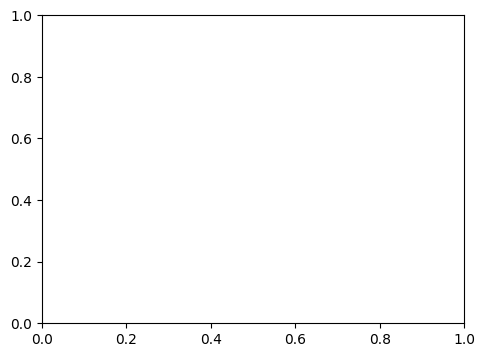

In [ ]:
# Visualisation de la température et de la pluie pour quelques villes
villes_exemple = archive_df["city"].unique()[:3] if "city" in archive_df.columns else []
for ville in villes_exemple:
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(archive_df[archive_df["city"] == ville]["temperature_2m"], kde=True)
    plt.title(f"Température - {ville}")
    plt.subplot(1, 2, 2)
    sns.histplot(archive_df[archive_df["city"] == ville]["rain"], kde=True)
    plt.title(f"Pluie - {ville}")
    plt.show()
